In [52]:
DRUG_1 = "MILADEMETAN (BRD:BRD-K00003406-001-01-9)"
DRUG_2 = "IDASANUTLIN _BRD:BRD-K62627508-001-01-5_"
DRUG_3 = "SAR405838 _BRD:BRD-A16035238-001-01-7_"
DRUG_4 = "CGM097 _BRD:BRD-K79584249-001-01-3_"
DRUG_5 = "AMG-232 _BRD:BRD-K64925568-001-01-8_"
DRUG_6 = "RG7112 _BRD:BRD-A78210457-001-01-5_"
TARGET_DRUG = DRUG_1

In [53]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [54]:
from urls import download_url, PRISM_DRUG_REPURPOSING, DEPMAP_MUTATION_DATA

lof_path = download_url(DEPMAP_MUTATION_DATA)
prism_path = download_url(PRISM_DRUG_REPURPOSING)

lof_df = pd.read_csv(lof_path)
prism_df = pd.read_csv(prism_path)

File already exists at /Users/sarameirab/workspace/bioinformatics_analysis/data/26a6842aa339d25d5e14e8ed8c24683c.csv
File already exists at /Users/sarameirab/workspace/bioinformatics_analysis/data/550cdc5a977b8a5c9501d02e0bf57c09.csv


In [55]:
lof_df = lof_df.rename(columns={'Unnamed: 0': 'cell_line'})
lof_df

,cell_line,FAM87B (400728),LINC01128 (643837),SAMD11 (148398),NOC2L (26155),KLHL17 (339451),PERM1 (84808),HES4 (57801),ISG15 (9636),AGRN (375790),...,OR7L1P (Unknown),MIR503HG (Unknown),TM9SF5P (Unknown),TRMT1P1 (Unknown),RPS4Y1 (6192),CHEK2P1 (Unknown),ARSDP1 (Unknown),ANOS2P (Unknown),TTTY13 (83868),TPTE2P4 (Unknown)
0,ACH-000062,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ACH-001949,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ACH-000402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ACH-000693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ACH-000930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,ACH-001093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1925,ACH-000083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1926,ACH-000134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1927,ACH-000131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
prism_df = prism_df.rename(columns={'Unnamed: 0': 'cell_line'})
prism_df

,cell_line,ARV-825 (BRD:BRD-A00047421-001-01-7),RS-0481 (BRD:BRD-A00055058-001-01-0),8-BROMO-CGMP (BRD:BRD-A00077618-236-07-6),DOCUSATE (BRD:BRD-A00092689-236-04-9),NIFURTIMOX (BRD:BRD-A00100033-001-08-9),BALAGLITAZONE (BRD:BRD-A00147595-001-01-5),FLUTRIMAZOLE (BRD:BRD-A00218260-001-03-4),KBG (BRD:BRD-A00376169-001-01-6),OTENZEPAD (BRD:BRD-A00520476-001-07-4),...,TALC (BRD:BRD-M92352362-002-02-3),EFONIDIPINE-MONOETHANOLATE (BRD:BRD-M92675308-003-07-1),LASOFOXIFENE (BRD:BRD-M93148412-001-02-6),DICHLOROACETATE (BRD:BRD-M97302542-001-03-6),CEVIMELINE (BRD:BRD-M98279124-300-01-1),COLESEVALAM (BRD:BRD-U08520523-000-01-0),TYLOXAPOL (BRD:BRD-U25960968-000-01-9),SEVELAMER (BRD:BRD-U45393375-000-01-6),TYLOXAPOL (BRD:BRD-U48018661-000-01-9),PHOSPHATIDYLCHOLINE (BRD:BRD-U51753822-000-01-1)
0,ACH-000001,-1.207281,0.515743,-0.015577,-0.395123,-0.449332,0.489379,0.206675,0.27273,0.021036,...,-0.856546,0.266364,-0.435815,-0.148373,-0.308255,0.125641,-0.067407,0.448387,-0.194616,-0.200107
1,ACH-000002,-4.231563,NaN,NaN,-0.538376,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.535864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ACH-000004,-3.860672,NaN,NaN,0.306971,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.787437,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ACH-000005,-2.271411,NaN,NaN,0.035096,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.180988,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ACH-000006,0.277833,NaN,NaN,-0.124899,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.651824,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,ACH-002039,-2.314389,NaN,NaN,0.202935,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.295103,NaN,NaN,NaN,NaN,NaN,NaN,NaN
910,ACH-002041,-2.805922,NaN,NaN,-0.335913,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.343104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
911,ACH-002042,-2.332483,NaN,NaN,-0.334916,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.886113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
912,ACH-002046,-3.441262,NaN,NaN,-0.343913,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.508481,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
cell_lines = prism_df['cell_line'].tolist()
len(cell_lines)

914

In [58]:
# Get the intersection of cell lines from both tables
available_cell_lines = list(set(cell_lines) & set(lof_df['cell_line'].tolist()))
len(available_cell_lines)

908

In [ ]:
lof_df = lof_df[lof_df['cell_line'].isin(available_cell_lines)]
prism_df = prism_df[prism_df['cell_line'].isin(available_cell_lines)]



# Merge the dataframes
merged_df = pd.merge(lof_df, prism_df, on='cell_line', how='inner')
merged_df


,cell_line,FAM87B (400728),LINC01128 (643837),SAMD11 (148398),NOC2L (26155),KLHL17 (339451),PERM1 (84808),HES4 (57801),ISG15 (9636),AGRN (375790),...,TALC (BRD:BRD-M92352362-002-02-3),EFONIDIPINE-MONOETHANOLATE (BRD:BRD-M92675308-003-07-1),LASOFOXIFENE (BRD:BRD-M93148412-001-02-6),DICHLOROACETATE (BRD:BRD-M97302542-001-03-6),CEVIMELINE (BRD:BRD-M98279124-300-01-1),COLESEVALAM (BRD:BRD-U08520523-000-01-0),TYLOXAPOL (BRD:BRD-U25960968-000-01-9),SEVELAMER (BRD:BRD-U45393375-000-01-6),TYLOXAPOL (BRD:BRD-U48018661-000-01-9),PHOSPHATIDYLCHOLINE (BRD:BRD-U51753822-000-01-1)
0,ACH-000062,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.593092,0.155420,-0.110680,0.066653,0.376504,-0.667170,0.339993,-0.784645,0.196559,-0.122816
1,ACH-000693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,-0.089930,-0.282444,NaN,0.034446,-0.413644,-0.558715,NaN,0.109949,-0.218330
2,ACH-000956,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.096350,-0.213070,0.102351,-0.112367,0.431514,0.087069,-0.106955,0.072231,-0.277884,-1.272322
3,ACH-000776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,-0.272577,-0.718362,NaN,0.231423,-0.685261,-0.383972,0.318919,0.064086,0.033310
4,ACH-000882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.170471,0.448463,-0.414354,-0.510164,0.129040,-0.317851,-0.042478,0.376372,-0.002272,0.463181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,ACH-000289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.210997,-0.258038,-2.560795,-0.292041,0.019278,-0.428988,-0.140898,NaN,-0.871838,-0.474771
904,ACH-000172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.464047,0.410463,-0.225154,-0.243637,0.454367,0.358763,-0.520311,0.005926,0.021185,-0.059934
905,ACH-000613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.476331,-0.125093,-0.638420,-1.322733,-1.082759,-0.404719,-0.119925,0.442954,0.010060,0.369898
906,ACH-000357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,-0.686232,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
lof_df = lof_df[lof_df['cell_line'].isin(available_cell_lines)]
prism_df = prism_df[prism_df['cell_line'].isin(available_cell_lines)]
prism_df_target_drug = prism_df[['cell_line', TARGET_DRUG]]



# Merge the dataframes
merged_df = pd.merge(lof_df, prism_df_target_drug, on='cell_line', how='inner')
merged_df = merged_df.dropna(subset=[TARGET_DRUG])

# Separate features and target
#X = merged_df.drop(columns=['DepMap_ID', TARGET_DRUG])
y = merged_df[TARGET_DRUG]
x = merged_df.drop(columns=['cell_line', TARGET_DRUG])


KeyError: 'cell_line'

In [ ]:
merged_df

,cell_line,FAM87B (400728),LINC01128 (643837),SAMD11 (148398),NOC2L (26155),KLHL17 (339451),PERM1 (84808),HES4 (57801),ISG15 (9636),AGRN (375790),...,TALC (BRD:BRD-M92352362-002-02-3),EFONIDIPINE-MONOETHANOLATE (BRD:BRD-M92675308-003-07-1),LASOFOXIFENE (BRD:BRD-M93148412-001-02-6),DICHLOROACETATE (BRD:BRD-M97302542-001-03-6),CEVIMELINE (BRD:BRD-M98279124-300-01-1),COLESEVALAM (BRD:BRD-U08520523-000-01-0),TYLOXAPOL (BRD:BRD-U25960968-000-01-9),SEVELAMER (BRD:BRD-U45393375-000-01-6),TYLOXAPOL (BRD:BRD-U48018661-000-01-9),PHOSPHATIDYLCHOLINE (BRD:BRD-U51753822-000-01-1)
0,ACH-000062,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.593092,0.155420,-0.110680,0.066653,0.376504,-0.667170,0.339993,-0.784645,0.196559,-0.122816
1,ACH-000693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,-0.089930,-0.282444,NaN,0.034446,-0.413644,-0.558715,NaN,0.109949,-0.218330
2,ACH-000956,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.096350,-0.213070,0.102351,-0.112367,0.431514,0.087069,-0.106955,0.072231,-0.277884,-1.272322
3,ACH-000776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,-0.272577,-0.718362,NaN,0.231423,-0.685261,-0.383972,0.318919,0.064086,0.033310
4,ACH-000882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.170471,0.448463,-0.414354,-0.510164,0.129040,-0.317851,-0.042478,0.376372,-0.002272,0.463181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,ACH-000289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.210997,-0.258038,-2.560795,-0.292041,0.019278,-0.428988,-0.140898,NaN,-0.871838,-0.474771
904,ACH-000172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.464047,0.410463,-0.225154,-0.243637,0.454367,0.358763,-0.520311,0.005926,0.021185,-0.059934
905,ACH-000613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.476331,-0.125093,-0.638420,-1.322733,-1.082759,-0.404719,-0.119925,0.442954,0.010060,0.369898
906,ACH-000357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,-0.686232,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
drug_df

NameError: name 'drug_df' is not defined

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
input_shape = X_train.shape[1]


In [ ]:
input_shape

19097

In [ ]:
#model2 = keras.Sequential([
#    layers.Input(shape=(input_shape,)),
#    layers.Dense(512, activation='relu'),
#    layers.Dropout(0.5),
#    layers.Dense(256, activation='relu'),
#    layers.Dropout(0.3),
#    layers.Dense(128, activation='relu'),
#    layers.Dropout(0.3),
#    layers.Dense(64, activation='relu'),
#    layers.Dropout(0.2),
#    layers.Dense(1)  # Output layer for regression
#])
#model2.compile(optimizer='adam', loss='mse', metrics=['mae', tf.keras.metrics.R2Score()])

In [ ]:
model = keras.Sequential([
        layers.Input(shape=(input_shape,)),
        layers.BatchNormalization(),
        layers.Dense(256, activation='relu', 
                     kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
        layers.Dropout(0.4),
        layers.Dense(128, activation='relu', 
                     kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='linear')
    ])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
    loss='mse', 
    metrics=['mae', tf.keras.metrics.R2Score()]
)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    restore_best_weights=True
)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'my_model.keras', 
    monitor='val_loss', 
    save_best_only=True
)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import KFold

# K-Fold Cross-Validation
def cross_validate_model(X, y, input_shape, n_splits=5):
    # Convert to numpy arrays to ensure indexing works
    X = np.array(X)
    y = np.array(y)
    
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    cv_scores = []
    
    for train_index, val_index in kfold.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
                
        history = model.fit(
            X_train, y_train, 
            validation_data=(X_val, y_val),
            epochs=100, 
            batch_size=32, 
            callbacks=[early_stopping, model_checkpoint],
            verbose=1
        )
        
        val_r2 = model.evaluate(X_val, y_val)[2]  # R2 score index
        cv_scores.append(val_r2)
    
    return np.mean(cv_scores), np.std(cv_scores)
mean_cv_score, std_cv_score = cross_validate_model(X_train, y_train, input_shape)
print(f"Cross-Validation R2: {mean_cv_score:.4f} ± {std_cv_score:.4f}")


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 2.8694 - mae: 0.3548 - r2_score: 0.8630 - val_loss: 5.1984 - val_mae: 0.8271 - val_r2_score: 0.0207
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 2.8912 - mae: 0.3809 - r2_score: 0.8873 - val_loss: 4.7183 - val_mae: 0.7477 - val_r2_score: 0.1898
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 2.7810 - mae: 0.3440 - r2_score: 0.9191 - val_loss: 4.5575 - val_mae: 0.7444 - val_r2_score: 0.2138
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 2.7403 - mae: 0.3338 - r2_score: 0.8923 - val_loss: 4.3815 - val_mae: 0.7179 - val_r2_score: 0.2561
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 2.6469 - mae: 0.3609 - r2_score: 0.9134 - val_loss: 4.2618 - val_mae: 0.6846 - val_r2_score: 0.2849
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 2.6482 - mae: 0.3629 - r2_score: 0.8908 - val_loss: 4.2467 - val_mae: 0.6850 - val_r2_score: 0.2845
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1

In [ ]:
X_test_np = np.array(X_test)
y_test_np = np.array(y_test)
model.evaluate(X_test_np, y_test_np)
#print(f"Test Loss: {loss:.4f}")
#print(f"Test MAE: {mae:.4f}")
#print(f"Test r_score: {r_score:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 11.6531 - mae: 1.0641 - r2_score: -1.8827


[10.463014602661133, 1.0502182245254517, -1.5921552181243896]

In [ ]:
predictions = []
for current in X_test:
    reshape_current = current.reshape(1, -1)
    prediction = model.predict(reshape_current)
    predictions.append(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━

In [ ]:
predictions_on_training = []
for current in X_train:
    reshape_current = current.reshape(1, -1)
    prediction = model.predict(reshape_current)
    predictions_on_training.append(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━

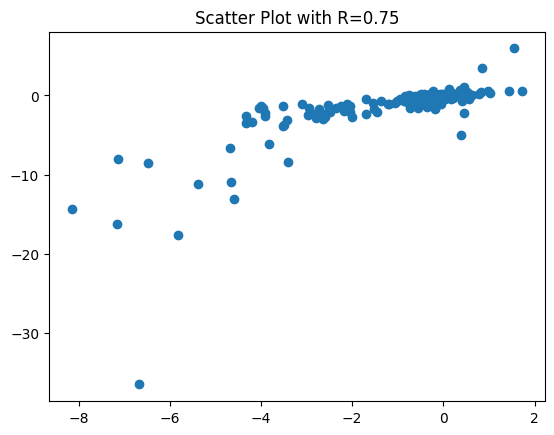

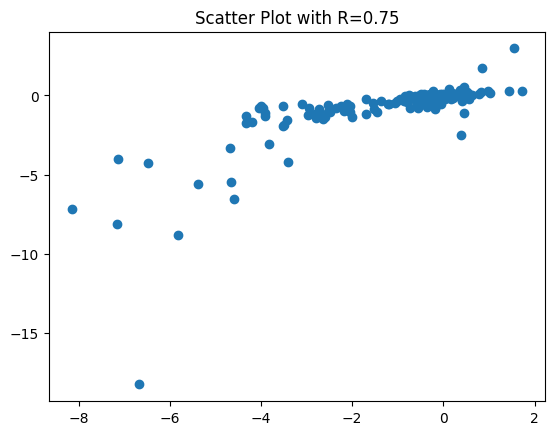

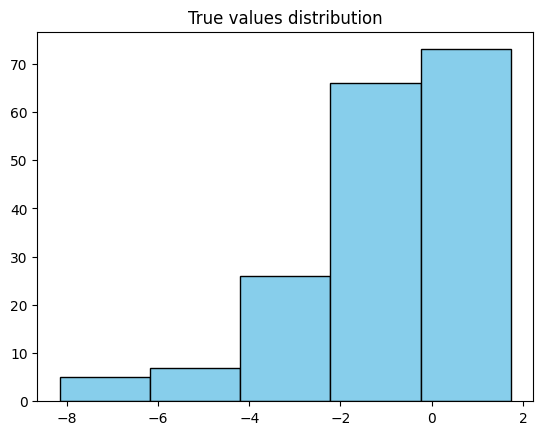

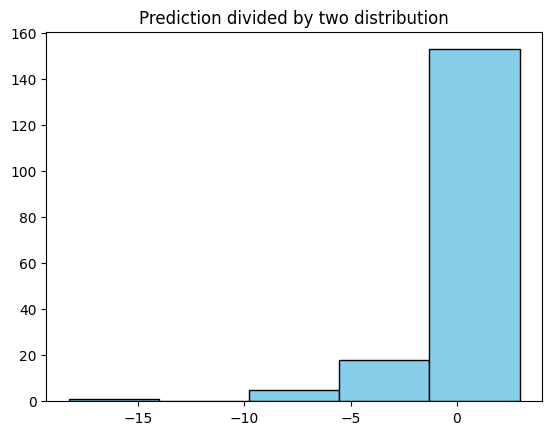

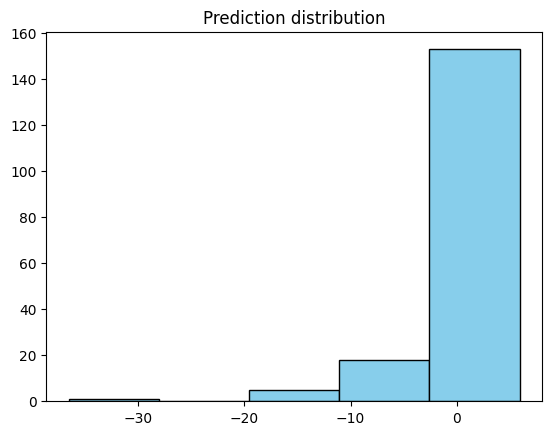

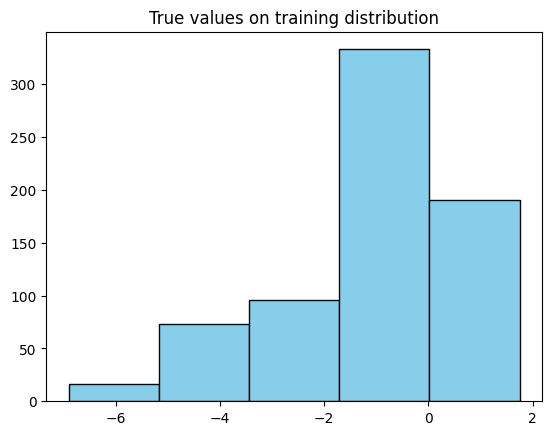

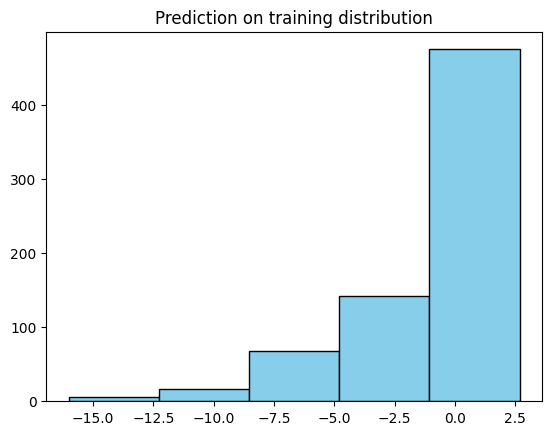

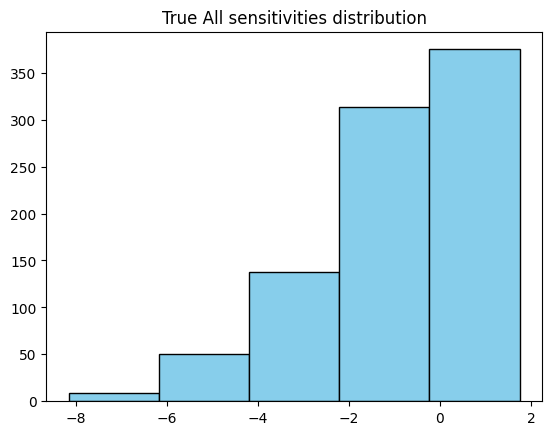

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
predictions_list = [item[0][0] for item in predictions]
predictions_list_divided_by_two = [item[0][0]/2.0 for item in predictions]

prediction_on_training_list = [item[0][0] for item in predictions_on_training]
true_values_list = y_test.tolist()
true_values_list = y_test.tolist()
true_values_on_training_list = y_train.tolist()
all_sensitivities = y.tolist()

r, p_value = pearsonr(true_values_list, predictions_list)
plt.title(f'Scatter Plot with R={r:.2f}')
plt.scatter(true_values_list, predictions_list)
plt.show()

r, p_value = pearsonr(true_values_list, predictions_list_divided_by_two)
plt.title(f'Scatter Plot with R={r:.2f}')
plt.scatter(true_values_list, predictions_list_divided_by_two)
plt.show()


plt.hist(true_values_list, bins=5, color='skyblue', edgecolor='black')
plt.title("True values distribution")
plt.show()

plt.hist(predictions_list_divided_by_two, bins=5, color='skyblue', edgecolor='black')
plt.title("Prediction divided by two distribution")
plt.show()


plt.hist(predictions_list, bins=5, color='skyblue', edgecolor='black')
plt.title("Prediction distribution")
plt.show()

plt.hist(true_values_on_training_list, bins=5, color='skyblue', edgecolor='black')
plt.title("True values on training distribution")
plt.show()


plt.hist(prediction_on_training_list, bins=5, color='skyblue', edgecolor='black')
plt.title("Prediction on training distribution")
plt.show()


plt.hist(all_sensitivities, bins=5, color='skyblue', edgecolor='black')
plt.title("True All sensitivities distribution")
plt.show()


In [ ]:
y_train

414   -1.004829
444    0.262521
369   -0.226892
363   -3.816305
82    -0.600685
         ...   
109    0.245200
276   -0.502501
883   -0.833354
445    0.631067
105   -0.380419
Name: MILADEMETAN _BRD:BRD-K00003406-001-01-9_, Length: 708, dtype: float64

In [ ]:
y_test

45    -2.524823
398   -0.454202
719   -1.016917
658   -0.551687
903   -1.463573
         ...   
121   -0.751817
829    0.823744
558   -3.523878
30    -0.547197
252    0.148391
Name: MILADEMETAN _BRD:BRD-K00003406-001-01-9_, Length: 177, dtype: float64

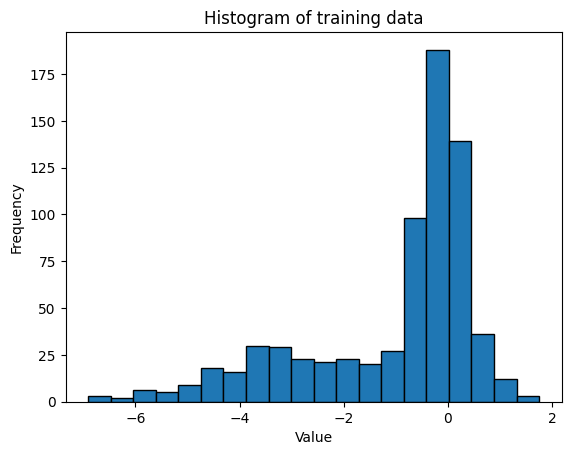

In [ ]:
plt.hist(y_train, bins=20, edgecolor='black')
plt.title('Histogram of training data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


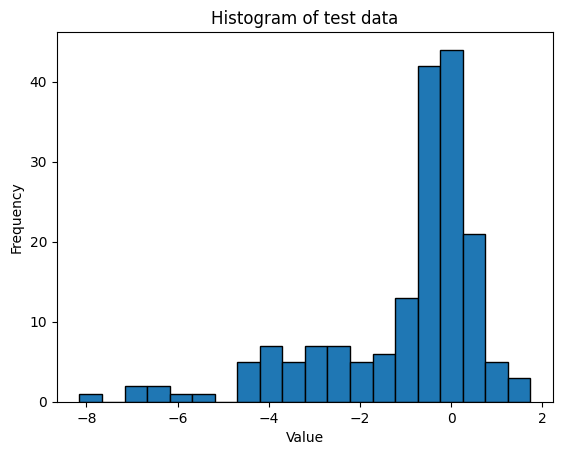

In [ ]:
plt.hist(y_test, bins=20, edgecolor='black')
plt.title('Histogram of test data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


In [ ]:
X

,PTEN (5728),INPPL1 (3636),YLPM1 (56252),INF2 (64423),ZNF92P2 (Unknown),ASTE1 (28990),MECOM (2122),AKAP9 (10142),LRRC17 (10234),SLC26A3 (1811),...,BMP1 (649),CHD7 (55636),UBR5 (51366),RLN2 (6019),ZNF462 (58499),GOLGA1 (2800),RNF128 (79589),TENM1 (10178),MAP7D3 (79649),FLNA (2316)
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
